<a href="https://colab.research.google.com/github/anacasicande/Modelamiento/blob/main/Mode_tarea_Jacobo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

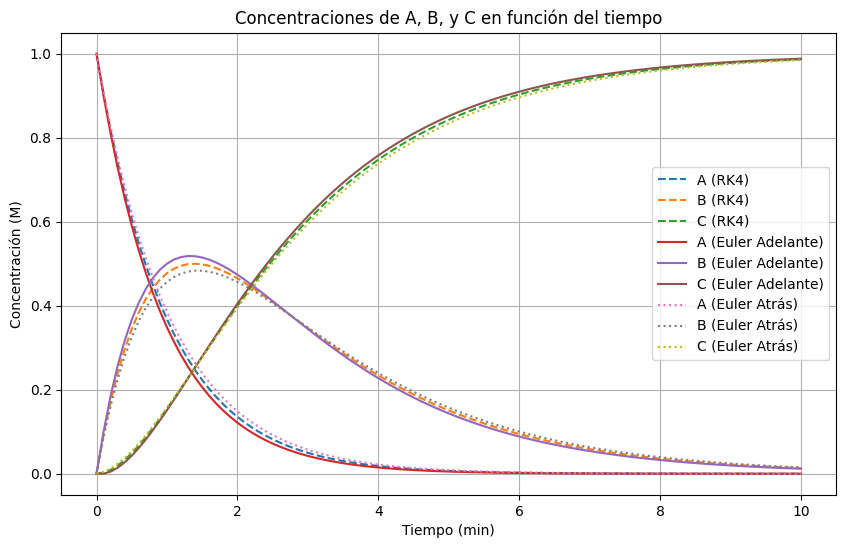

In [6]:
import numpy as np  # Importa la librería NumPy para operaciones numéricas, como la creación de vectores y matrices.
import matplotlib.pyplot as plt  # Importa Matplotlib para generar gráficos.

# Constantes de reacción
k1 = 1  # min^-1, constante de reacción para la transformación de A a B
k2 = 0.5  # min^-1, constante de reacción para la transformación de B a C
t0, tf, dt = 0, 10, 0.1  # Define el tiempo inicial (t0), final (tf), y el tamaño del paso de tiempo (dt).

# Condiciones iniciales
A0, B0, C0 = 1.0, 0.0, 0.0  # Concentraciones iniciales de A, B, y C respectivamente.

# Método de Euler hacia adelante
def euler_adelante(t0, tf, dt, A0, B0, C0, k1, k2):
    N = int((tf - t0) / dt)  # Calcula el número de pasos de tiempo.
    t = np.linspace(t0, tf, N+1)  # Genera un vector de tiempo desde t0 hasta tf con N+1 puntos.
    A, B, C = np.zeros(N+1), np.zeros(N+1), np.zeros(N+1)  # Inicializa los vectores de concentración de A, B, y C.
    A[0], B[0], C[0] = A0, B0, C0  # Asigna las condiciones iniciales.

    for i in range(N):  # Itera sobre cada paso de tiempo.
        A[i+1] = A[i] + dt * (-k1 * A[i])  # Actualiza la concentración de A usando la fórmula de Euler hacia adelante.
        B[i+1] = B[i] + dt * (k1 * A[i] - k2 * B[i])  # Actualiza la concentración de B.
        C[i+1] = C[i] + dt * (k2 * B[i])  # Actualiza la concentración de C.
    return t, A, B, C  # Devuelve el vector de tiempo y las concentraciones de A, B, y C.

# Método de Euler hacia atrás
def euler_atras(t0, tf, dt, A0, B0, C0, k1, k2):
    N = int((tf - t0) / dt)  # Calcula el número de pasos de tiempo.
    t = np.linspace(t0, tf, N+1)  # Genera un vector de tiempo.
    A, B, C = np.zeros(N+1), np.zeros(N+1), np.zeros(N+1)  # Inicializa los vectores de concentración.
    A[0], B[0], C[0] = A0, B0, C0  # Asigna las condiciones iniciales.

    for i in range(N):  # Itera sobre cada paso de tiempo.
        A_next = A[i] / (1 + k1 * dt)  # Calcula la próxima concentración de A.
        B_next = (B[i] + dt * k1 * A_next) / (1 + k2 * dt)  # Calcula la próxima concentración de B.
        C_next = C[i] + dt * k2 * B_next  # Calcula la próxima concentración de C.
        A[i+1], B[i+1], C[i+1] = A_next, B_next, C_next  # Asigna las concentraciones calculadas al siguiente paso.
    return t, A, B, C  # Devuelve el vector de tiempo y las concentraciones de A, B, y C.

# Método de Runge-Kutta de cuarto orden (RK4)
def rk4(t0, tf, dt, A0, B0, C0, k1, k2):
    N = int((tf - t0) / dt)  # Calcula el número de pasos de tiempo.
    t = np.linspace(t0, tf, N+1)  # Genera un vector de tiempo.
    A, B, C = np.zeros(N+1), np.zeros(N+1), np.zeros(N+1)  # Inicializa los vectores de concentración.
    A[0], B[0], C[0] = A0, B0, C0  # Asigna las condiciones iniciales.

    for i in range(N):  # Itera sobre cada paso de tiempo.
        # Cálculo de los valores intermedios de Runge-Kutta (k1, k2, k3, k4) para A, B y C
        k1_A = dt * (-k1 * A[i])  # Primer valor intermedio para A.
        k2_A = dt * (-k1 * (A[i] + 0.5 * k1_A))  # Segundo valor intermedio para A.
        k3_A = dt * (-k1 * (A[i] + 0.5 * k2_A))  # Tercer valor intermedio para A.
        k4_A = dt * (-k1 * (A[i] + k3_A))  # Cuarto valor intermedio para A.
        A[i+1] = A[i] + (k1_A + 2 * k2_A + 2 * k3_A + k4_A) / 6  # Actualización de A.

        k1_B = dt * (k1 * A[i] - k2 * B[i])  # Primer valor intermedio para B.
        k2_B = dt * (k1 * (A[i] + 0.5 * k1_A) - k2 * (B[i] + 0.5 * k1_B))  # Segundo valor intermedio para B.
        k3_B = dt * (k1 * (A[i] + 0.5 * k2_A) - k2 * (B[i] + 0.5 * k2_B))  # Tercer valor intermedio para B.
        k4_B = dt * (k1 * (A[i] + k3_A) - k2 * (B[i] + k3_B))  # Cuarto valor intermedio para B.
        B[i+1] = B[i] + (k1_B + 2 * k2_B + 2 * k3_B + k4_B) / 6  # Actualización de B.

        k1_C = dt * (k2 * B[i])  # Primer valor intermedio para C.
        k2_C = dt * (k2 * (B[i] + 0.5 * k1_B))  # Segundo valor intermedio para C.
        k3_C = dt * (k2 * (B[i] + 0.5 * k2_B))  # Tercer valor intermedio para C.
        k4_C = dt * (k2 * (B[i] + k3_B))  # Cuarto valor intermedio para C.
        C[i+1] = C[i] + (k1_C + 2 * k2_C + 2 * k3_C + k4_C) / 6  # Actualización de C.

    return t, A, B, C  # Devuelve el vector de tiempo y las concentraciones de A, B, y C.

# Ejecución de los métodos
t_euler, A_euler, B_euler, C_euler = euler_adelante(t0, tf, dt, A0, B0, C0, k1, k2)  # Ejecuta Euler hacia adelante.
t_euler_atras, A_euler_atras, B_euler_atras, C_euler_atras = euler_atras(t0, tf, dt, A0, B0, C0, k1, k2)  # Ejecuta Euler hacia atrás.
t_rk4, A_rk4, B_rk4, C_rk4 = rk4(t0, tf, dt, A0, B0, C0, k1, k2)  # Ejecuta el método de Runge-Kutta de cuarto orden.

# Gráficos
plt.figure(figsize=(10, 6))  # Crea una figura de tamaño 10x6 pulgadas.
plt.plot(t_rk4, A_rk4, label='A (RK4)', linestyle='--')  # Grafica la concentración de A usando RK4.
plt.plot(t_rk4, B_rk4, label='B (RK4)', linestyle='--')  # Grafica la concentración de B usando RK4.
plt.plot(t_rk4, C_rk4, label='C (RK4)', linestyle='--')  # Grafica la concentración de C usando RK4.
plt.plot(t_euler, A_euler, label='A (Euler Adelante)')  # Grafica la concentración de A usando Euler hacia adelante.
plt.plot(t_euler, B_euler, label='B (Euler Adelante)')  # Grafica la concentración de B usando Euler hacia adelante.
plt.plot(t_euler, C_euler, label='C (Euler Adelante)')  # Grafica la concentración de C usando Euler hacia adelante.
plt.plot(t_euler_atras, A_euler_atras, label='A (Euler Atrás)', linestyle=':')  # Grafica A usando Euler hacia atrás.
plt.plot(t_euler_atras, B_euler_atras, label='B (Euler Atrás)', linestyle=':')  # Grafica B usando Euler hacia atrás.
plt.plot(t_euler_atras, C_euler_atras, label='C (Euler Atrás)', linestyle=':')  # Grafica C usando Euler hacia atrás.
plt.xlabel('Tiempo (min)')  # Etiqueta del eje x.
plt.ylabel('Concentración (M)')  # Etiqueta del eje y.
plt.legend()  # Añade una leyenda para identificar cada serie de datos.
plt.title('Concentraciones de A, B, y C en función del tiempo')  # Título del gráfico.
plt.grid()  # Añade una cuadrícula al gráfico.
plt.show()  # Muestra el gráfico.


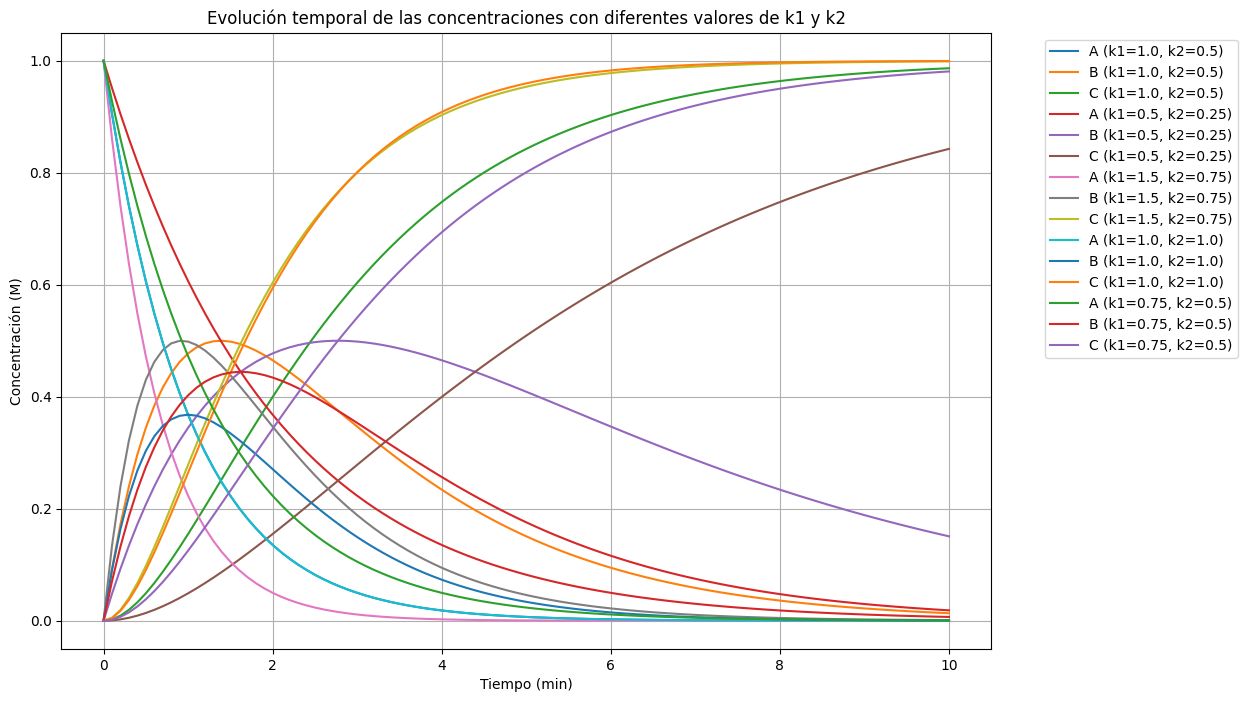

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes y condiciones iniciales
t0, tf, dt = 0, 10, 0.1  # tiempo inicial, final y paso de tiempo
A0, B0, C0 = 1.0, 0.0, 0.0  # Concentraciones iniciales de A, B, y C respectivamente.

# Función de Runge-Kutta de cuarto orden (RK4)
def rk4(t0, tf, dt, A0, B0, C0, k1, k2):
    N = int((tf - t0) / dt)  # número de pasos de tiempo
    t = np.linspace(t0, tf, N+1)  # vector de tiempo
    A, B, C = np.zeros(N+1), np.zeros(N+1), np.zeros(N+1)  # inicialización de concentraciones
    A[0], B[0], C[0] = A0, B0, C0  # asignación de condiciones iniciales

    for i in range(N):
        # Cálculo de k1, k2, k3, y k4 para A, B y C
        k1_A = dt * (-k1 * A[i])
        k2_A = dt * (-k1 * (A[i] + 0.5 * k1_A))
        k3_A = dt * (-k1 * (A[i] + 0.5 * k2_A))
        k4_A = dt * (-k1 * (A[i] + k3_A))
        A[i+1] = A[i] + (k1_A + 2 * k2_A + 2 * k3_A + k4_A) / 6

        k1_B = dt * (k1 * A[i] - k2 * B[i])
        k2_B = dt * (k1 * (A[i] + 0.5 * k1_A) - k2 * (B[i] + 0.5 * k1_B))
        k3_B = dt * (k1 * (A[i] + 0.5 * k2_A) - k2 * (B[i] + 0.5 * k2_B))
        k4_B = dt * (k1 * (A[i] + k3_A) - k2 * (B[i] + k3_B))
        B[i+1] = B[i] + (k1_B + 2 * k2_B + 2 * k3_B + k4_B) / 6

        k1_C = dt * (k2 * B[i])
        k2_C = dt * (k2 * (B[i] + 0.5 * k1_B))
        k3_C = dt * (k2 * (B[i] + 0.5 * k2_B))
        k4_C = dt * (k2 * (B[i] + k3_B))
        C[i+1] = C[i] + (k1_C + 2 * k2_C + 2 * k3_C + k4_C) / 6

    return t, A, B, C  # Devuelve el tiempo y las concentraciones

# Valores de k1 y k2 para comparar
k_values = [(1.0, 0.5), (0.5, 0.25), (1.5, 0.75), (1.0, 1.0), (0.75, 0.5)]

# Gráficos comparativos
plt.figure(figsize=(12, 8))
for k1, k2 in k_values:
    t, A, B, C = rk4(t0, tf, dt, A0, B0, C0, k1, k2)  # Ejecuta RK4 con diferentes k1 y k2
    plt.plot(t, A, label=f'A (k1={k1}, k2={k2})')  # Grafica A
    plt.plot(t, B, label=f'B (k1={k1}, k2={k2})')  # Grafica B
    plt.plot(t, C, label=f'C (k1={k1}, k2={k2})')  # Grafica C

plt.xlabel('Tiempo (min)')
plt.ylabel('Concentración (M)')
plt.title('Evolución temporal de las concentraciones con diferentes valores de k1 y k2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()
